## Analysis of Epinions Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned Epinions sub-dataset that is different from the one in Portfolio 1. 

### Import Cleaned Epinions Dataset
The csv file named 'Epinions_cleaned_data_portfolio_2.csv'is provided. Please import the csv file (i.e., 'Epinions_cleaned_data_portfolio_2') and print out its total length.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [2]:
opinion = pd.read_csv('data/Epinions_cleaned_data_portfolio_2.csv')

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies


In [5]:
print(opinion.shape[0])

2899


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating (positive or negative). Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [6]:
opinion.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies


In [8]:
opinion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2899 non-null   int64  
 1   timestamp    2899 non-null   int64  
 2   review       2899 non-null   object 
 3   item         2899 non-null   object 
 4   rating       2899 non-null   float64
 5   helpfulness  2899 non-null   float64
 6   gender       2899 non-null   object 
 7   category     2899 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 181.3+ KB


In [16]:
opinion.corr()

,userId,timestamp,rating,helpfulness
userId,1.000000,-0.036399,0.008164,-0.016841
timestamp,-0.036399,1.000000,0.019860,0.003638
rating,0.008164,0.019860,1.000000,-0.016832
helpfulness,-0.016841,0.003638,-0.016832,1.000000


In [19]:
#Transforming the Gender column to numbers

ord_enc = OrdinalEncoder()
opinion["gender_code"] = ord_enc.fit_transform(opinion[["gender"]])
opinion[["gender", "gender_code"]].head(20)

,gender,gender_code
0,F,0.0
1,F,0.0
2,F,0.0
3,F,0.0
4,F,0.0
5,F,0.0
6,F,0.0
7,F,0.0
8,F,0.0
9,F,0.0


In [20]:
#Transforming the Category column to numbers

ord_enc = OrdinalEncoder()
opinion["category_code"] = ord_enc.fit_transform(opinion[["category"]])
opinion[["category", "category_code"]].head(20)

,category,category_code
0,Online Stores & Services,6.0
1,Movies,5.0
2,Movies,5.0
3,Movies,5.0
4,Movies,5.0
5,Hotels & Travel,2.0
6,Online Stores & Services,6.0
7,Movies,5.0
8,Hotels & Travel,2.0
9,Movies,5.0


In [21]:
#Transforming the Review column to numbers

ord_enc = OrdinalEncoder()
opinion["review_code"] = ord_enc.fit_transform(opinion[["review"]])
opinion[["review", "review_code"]].head(20)

,review,review_code
0,"Finally, Something for (Relatively) Nothing",856.0
1,Shocking!,1985.0
2,Simply Shaggadelic!,2006.0
3,Better Than The First!,472.0
4,Blair Witch made me appreciate this,493.0
5,Come here at least once in your life... stay a...,599.0
6,"I joined for the free camera, and stood for no...",1232.0
7,They Should've Fooled the American Public,2415.0
8,A Short List of Things to Remember in NYC,136.0
9,Do you know what a metaphysical can of worms t...,692.0


In [23]:
#We can see correlation of all numbers

opinion.corr()

,userId,timestamp,rating,helpfulness,gender_code,category_code,review_code
userId,1.000000,-0.036399,0.008164,-0.016841,0.056183,0.015408,0.013212
timestamp,-0.036399,1.000000,0.019860,0.003638,-0.049244,0.037118,-0.025036
rating,0.008164,0.019860,1.000000,-0.016832,0.018105,-0.140576,-0.062071
helpfulness,-0.016841,0.003638,-0.016832,1.000000,-0.046627,-0.000189,0.016170
gender_code,0.056183,-0.049244,0.018105,-0.046627,1.000000,-0.017644,-0.014422
category_code,0.015408,0.037118,-0.140576,-0.000189,-0.017644,1.000000,0.012047
review_code,0.013212,-0.025036,-0.062071,0.016170,-0.014422,0.012047,1.000000


- Helpfulness: Rating is correlated negatively, and only slightly with helpfulness, at -0.017
- Gender: Rating is correlated positively, slightly at 0.018
- Category: Rating is correlated the most out of all features, negatively at -0.14
- Review: Rating is correlated negatively, at -0.062

Conclusion
- More correlated: category, review
- Less correlated: helpfulness, gender

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [25]:
train1, test1 = train_test_split(opinion, test_size=0.9, random_state=142)
print(train1.shape)
print(test1.shape)

(289, 11)
(2610, 11)


In [26]:
train2, test2 = train_test_split(opinion, test_size=0.1, random_state=142)
print(train2.shape)
print(test2.shape)

(2609, 11)
(290, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select __two most correlated features and two least correlated features__ regarding rating, respectively. 
* Train __four__ linear regression models by following the conditions:
    - (model-a) using the training/testing data in __case 1__ with __two most__ correlated input features
    - (model-b) using the training/testing data in __case 1__ with __two least__ correlated input features
    - (model-c) using the training/testing data in __case 2__ with __two most__ correlated input features
    - (model-d) using the training/testing data in __case 2__ with __two least__ correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [111]:
#The model
reg = linear_model.LinearRegression()

#Creating train set for model A
Xa = train1[['category_code', 'review_code']]
ya = train1['rating']

reg.fit(Xa, ya)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-1.42431568e-01 -1.23547895e-04] + 4.6136429664568475


In [113]:
#Creating test set for model A

Xat = test1[['category_code', 'review_code']]
yat = test1['rating']

reg.fit(Xat, yat)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-1.09849814e-01 -9.56920081e-05] + 4.35617662436803


In [115]:
#For model B

Xb = train1[['helpfulness', 'gender_code']]
yb = train1['rating']

reg.fit(Xb, yb)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.32823006  0.14497204] + 4.921999553684607


In [117]:
Xbt = test1[['helpfulness', 'gender_code']]
ybt = test1['rating']

reg.fit(Xbt, ybt)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.03588826  0.03734442] + 3.78972511933596


In [119]:
#For model C

Xc = train2[['category_code', 'review_code']]
yc = train2['rating']

reg.fit(Xc, yc)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-1.08951296e-01 -7.77769823e-05] + 4.332388331792272


In [121]:
Xct = test2[['category_code', 'review_code']]
yct = test2['rating']

reg.fit(Xct, yct)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.15120211 -0.00026225] + 4.775462818538641


In [135]:
#For model D

Xd = train2[['helpfulness', 'gender_code']]
yd = train2['rating']

reg.fit(Xb, yb)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.32823006  0.14497204] + 4.921999553684607


In [131]:
Xdt = test2[['helpfulness', 'gender_code']]
ydt = test2['rating']

reg.fit(Xbt, ybt)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-0.03588826  0.03734442] + 3.78972511933596


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [112]:
#Evaluate model A train

predicted_traina = reg.predict(Xa)
mse_traina = ((np.array(ya)-predicted_traina)**2).sum()/len(ya)
r2_traina = r2_score(ya, predicted_traina)
print("MSE train:", mse_traina)
print("R Squared train:", r2_traina)

MSE train: 1.828834570290101
R Squared train: 0.03404735252514057


In [114]:
#Evaluate model A test

predicted_trainat = reg.predict(Xat)
mse_trainat = ((np.array(yat)-predicted_trainat)**2).sum()/len(yat)
r2_trainat = r2_score(yat, predicted_trainat)
print("MSE test:", mse_trainat)
print("R Squared test:", r2_trainat)

MSE test: 1.7596966118345827
R Squared test: 0.022390771203009585


In [116]:
#Evaluate model B train

predicted_trainb = reg.predict(Xb)
mse_trainb = ((np.array(yb)-predicted_trainb)**2).sum()/len(yb)
r2_trainb = r2_score(yb, predicted_trainb)
print("MSE train:", mse_trainb)
print("R Squared train:", r2_trainb)

MSE train: 1.8760480468086231
R Squared train: 0.009110169370119436


In [118]:
#Evaluate model B test

predicted_trainbt = reg.predict(Xbt)
mse_trainbt = ((np.array(ybt)-predicted_trainbt)**2).sum()/len(ybt)
r2_trainbt = r2_score(ybt, predicted_trainbt)
print("MSE test:", mse_trainbt)
print("R Squared test:", r2_trainbt)

MSE test: 1.799495810986348
R Squared test: 0.00028010500758446355


In [120]:
#Evaluate model C train

predicted_trainc = reg.predict(Xc)
mse_trainc = ((np.array(yc)-predicted_trainc)**2).sum()/len(yc)
r2_trainc = r2_score(yc, predicted_trainc)
print("MSE train:", mse_trainc)
print("R Squared train:", r2_trainc)

MSE train: 1.7776218948436504
R Squared train: 0.020495764175804676


In [122]:
#Evaluate model C test

predicted_trainct = reg.predict(Xct)
mse_trainct = ((np.array(yct)-predicted_trainct)**2).sum()/len(yct)
r2_trainct = r2_score(yct, predicted_trainct)
print("MSE test:", mse_trainct)
print("R Squared test:", r2_trainct)

MSE test: 1.645003566408746
R Squared test: 0.06609602031258077


In [136]:
#Evaluate model D train

predicted_traind = reg.predict(Xd)
mse_traind = ((np.array(yd)-predicted_traind)**2).sum()/len(yd)
r2_traind = r2_score(yd, predicted_traind)
print("MSE train:", mse_traind)
print("R Squared train:", r2_traind)

MSE train: 1.8258564579233003
R Squared train: -0.006082418162460135


In [132]:
#Evaluate model D test

predicted_traindt = reg.predict(Xdt)
mse_traindt = ((np.array(ydt)-predicted_traindt)**2).sum()/len(ydt)
r2_traindt = r2_score(ydt, predicted_traindt)
print("MSE test:", mse_traindt)
print("R Squared test:", r2_traindt)

MSE test: 1.7577971671677723
R Squared test: 0.0020606621023272487


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [127]:
#Creating a dataframe for all the values found for 4 models to evaluate

results = pd.DataFrame({'mse Train': [mse_traina, mse_trainb, mse_trainc, mse_traind],
                         'mse Test': [mse_trainat, mse_trainbt, mse_trainct, mse_traindt],
                         'Rsquared Train': [r2_traina, r2_trainb, r2_trainc, r2_traind],
                         'Rsquared Test': [r2_trainat, r2_trainbt, r2_trainct, r2_traindt]},
                  index = ['Model A', 'Model B', 'Model C', 'Model D'])

results

,mse Train,mse Test,Rsquared Train,Rsquared Test
Model A,1.828835,1.759697,0.034047,0.022391
Model B,1.876048,1.799496,0.009110,0.000280
Model C,1.777622,1.645004,0.020496,0.066096
Model D,1.825856,1.757797,-0.006082,0.002061


<AxesSubplot:>

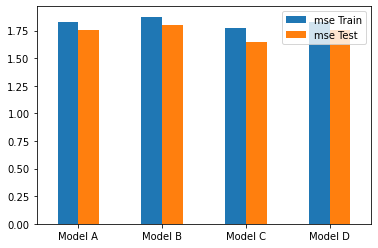

In [128]:
#Create bar plots for the values of mse

results[['mse Train', 'mse Test']].plot.bar(rot=0)

<AxesSubplot:>

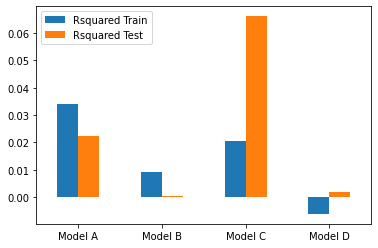

In [129]:
#Create bar plots for the values of Rsquared


results[['Rsquared Train', 'Rsquared Test']].plot.bar(rot=0)

MSE
- We can see that Model C performs the best, as MSE is lowest for both train and test sets
- By MSE, all models overfitted to the train set

Rsquared
- By Rsquared, we see that model C again performs the best, as Rsquared did not overfit to train set, and has highest Rsquared in test case
- Model A performed best on train set but did not perform as well on test set

Conclusion
- This makes sense, as model C is with bigger training set and also with the more correlated features